In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [11]:
import pathlib
from pathlib import Path
#dir_path = pathlib.Path.cwd()
path = Path("forest_dataset.csv") 
None

In [12]:
all_data = pd.read_csv(path)
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [13]:
# all_data = pd.read_csv(r'C:\Users\zumag\Downloads\forest_dataset.csv')
# all_data.head()

In [14]:
all_data.shape

(10000, 55)

In [15]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [16]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.2, 
                                                                                       random_state = 42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()    
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

In [18]:
accuracy_score(test_labels, y_pred)

0.7365

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier() 
params = {'n_neighbors': np.arange(1,10),
          'metric': ['manhattan','euclidean'],
          'weights': ['uniform', 'distance'],
}

search = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
search.fit(feature_matrix, labels)

search.best_params_

In [19]:
optimal_clf = KNeighborsClassifier(n_neighbors = 4)
optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

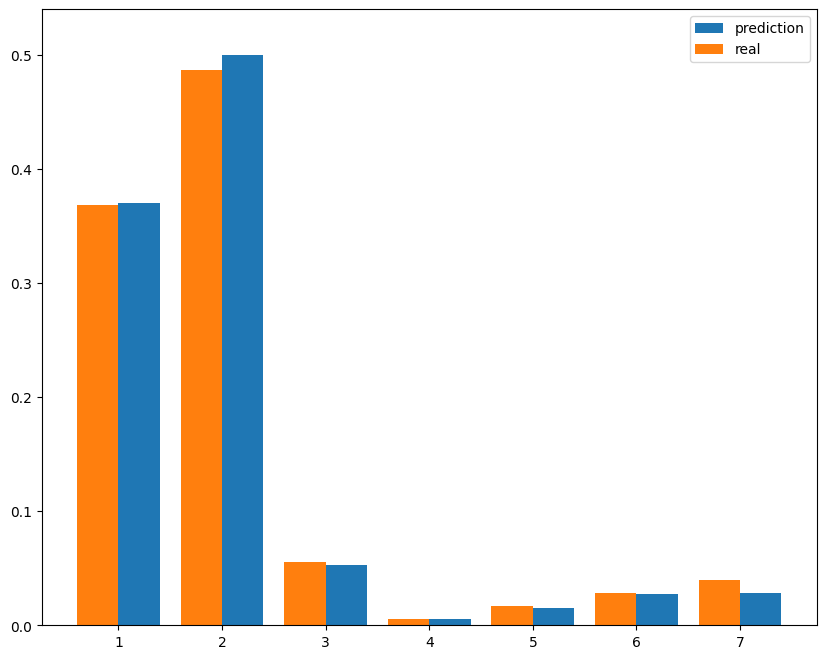

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()